In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [142]:
data = pd.read_csv("titanic.csv")

In [143]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
data.shape

(891, 12)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [156]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1. Pclass

In [157]:
print(data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


### 2. Sex

In [158]:
print(data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


### 3. SibSp

In [159]:
print(data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


### 4. Parch

In [160]:
print(data[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


### 5. Embarked

In [161]:
print(data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


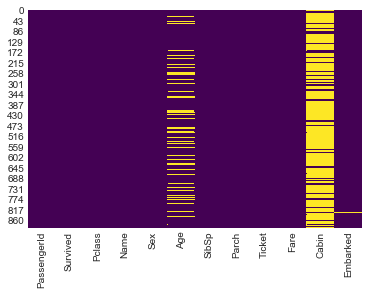

In [162]:
sns.heatmap(data=data.isnull(),cbar=False, cmap="viridis")

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

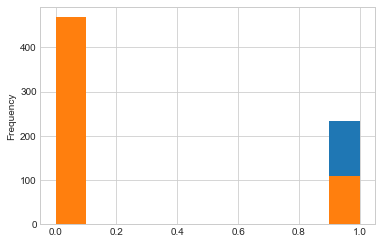

In [171]:
data["Survived"].groupby(data["Sex"]).plot(kind="hist")

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

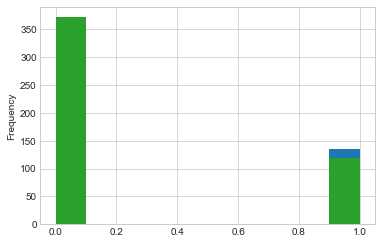

In [172]:
data["Survived"].groupby(data["Pclass"]).plot(kind="hist")

Parch
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

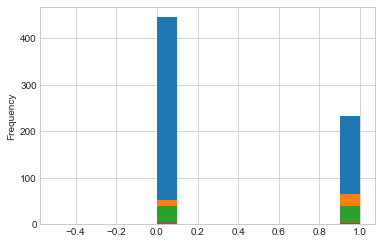

In [174]:
data["Survived"].groupby(data["Parch"]).plot(kind="hist")

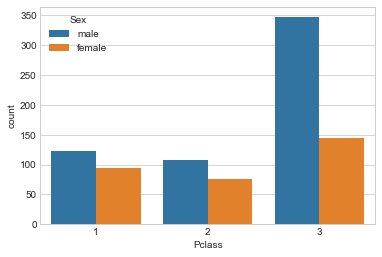

In [166]:
sns.countplot("Pclass", data=data, hue="Sex")

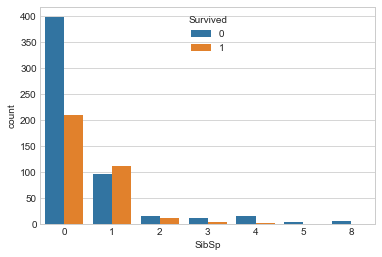

In [167]:
sns.countplot("SibSp", data=data, hue='Survived')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AF5C36CC0>]],
      dtype=object)

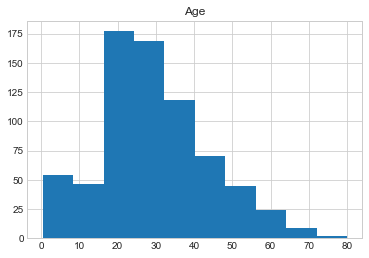

In [168]:
data.hist("Age")

In [83]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [84]:
le = LabelEncoder()
data.Sex = le.fit_transform(data["Sex"])

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [101]:
X = data.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = data[["Survived"]]

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
model1 = LogisticRegression()

In [111]:
model1.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
predict = model1.predict(X_test)

In [127]:
model1.score(X_test, y_test)

0.8135593220338984

In [133]:
print(predict[:10])
print(np.array(y_test[:10]))

[0 0 0 1 1 1 1 0 1 1]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [138]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, log_loss, jaccard_similarity_score

In [140]:
print("Classification Report")
print(classification_report(y_test, predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict))
print("F1- Score")
print(f1_score(y_test, predict))
print("Log Loss")
print(log_loss(y_test, predict))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict))

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       175
          1       0.82      0.69      0.75       120

avg / total       0.81      0.81      0.81       295

Confusion Matrix
[[157  18]
 [ 37  83]]
F1- Score
0.751131221719457
Log Loss
6.439481676182479
Jaccard Similarity Index
0.8135593220338984
